## ................................................... Created by Rahul Kumar .........................................................

In [62]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

### Creating a simple signal with two frequencies 

In [63]:
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f.copy()

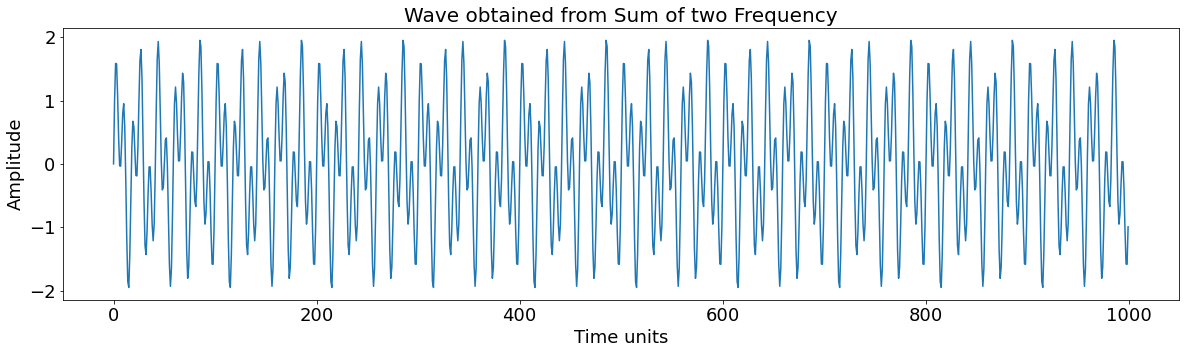

In [66]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(f_clean)
ax.set_title('Wave obtained from Sum of two Frequency', fontsize=20)
plt.xlabel("Time units")
plt.ylabel("Amplitude")
plt.show()

### Adding noise to above wave

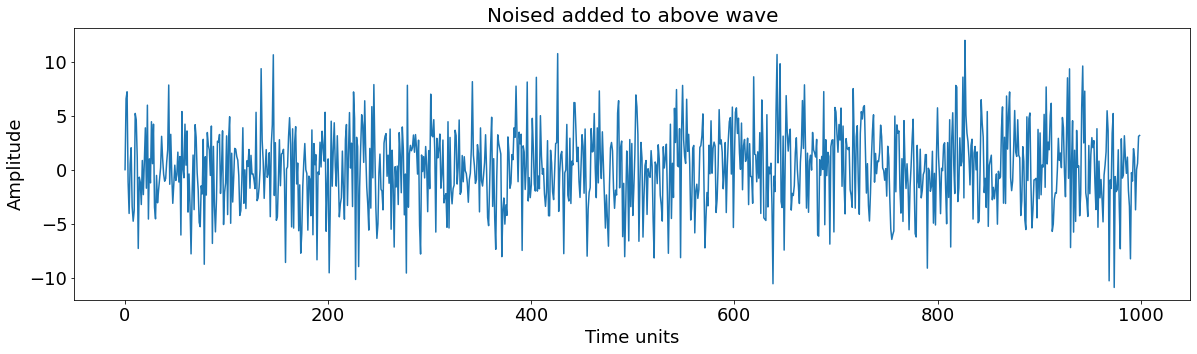

In [67]:
f = f + 2.5*np.random.randn(len(t))
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(f)
ax.set_title('Noised added to above wave', fontsize=20)
plt.xlabel("Time units")
plt.ylabel("Amplitude")
plt.show()

### Compute the Fast Fourier Transform

In [68]:
n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

C:\Users\91888\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


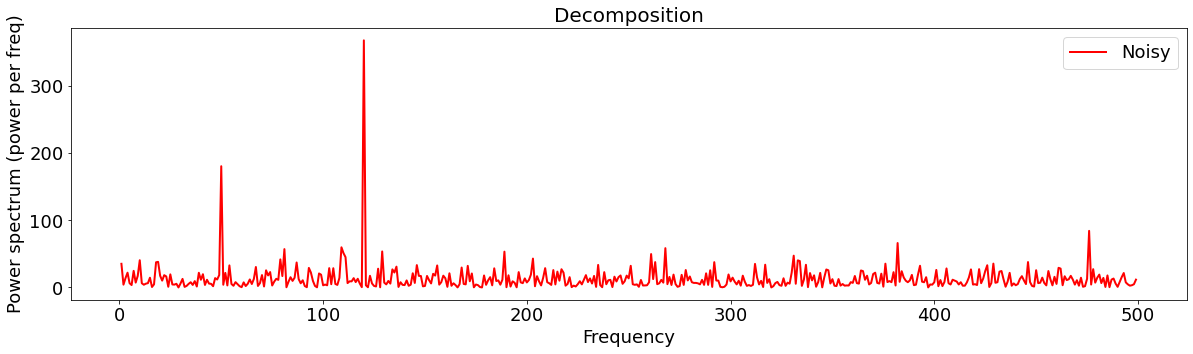

In [69]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(freq[L],PSD[L],color='r',LineWidth=2,label='Noisy')
ax.set_title('Decomposition', fontsize=20)
plt.xlabel("Frequency")
plt.ylabel("Power spectrum (power per freq)")
plt.legend()
plt.show()

### Use the PSD to filter out noise

In [70]:
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

C:\Users\91888\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\91888\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\91888\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


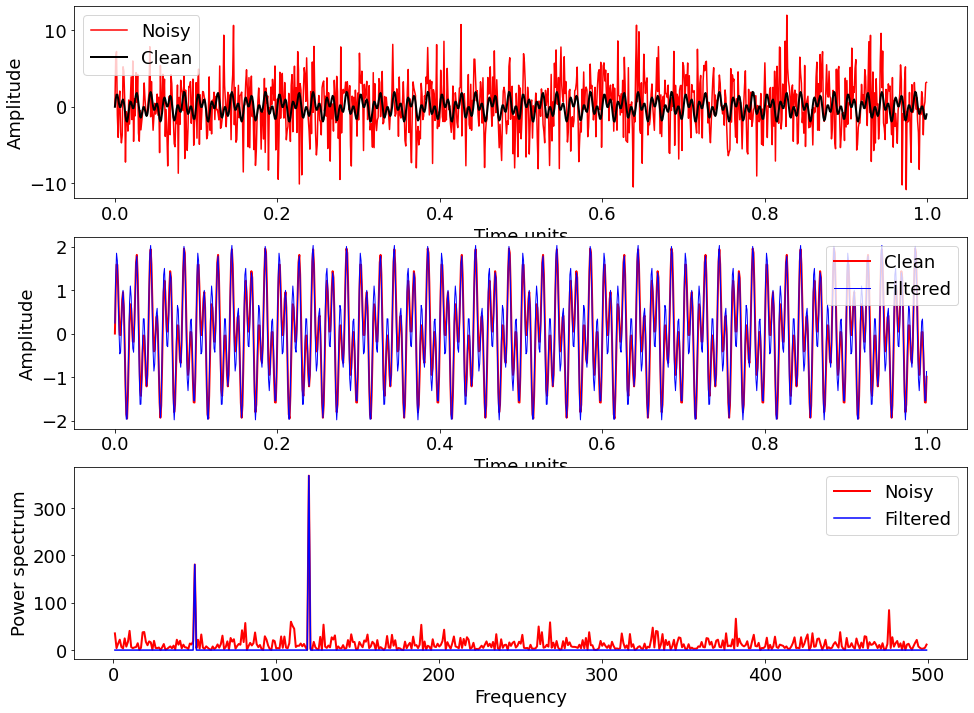

In [71]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlabel("Time units")
plt.ylabel("Amplitude")
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='r',LineWidth=2,label='Clean')
plt.plot(t,ffilt,color='b',LineWidth=1,label='Filtered')
plt.xlabel("Time units")
plt.ylabel("Amplitude")
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='r',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',LineWidth=1.5,label='Filtered')
plt.xlabel("Frequency")
plt.ylabel("Power spectrum")
plt.legend()

plt.show()